In [330]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# **Data**

In [332]:
# Setting
# The size of the test split and validation split
test = 0.1
# Eandom seed
random_seed = 10
# load in data: 'wine.csv'
#data = pd.read_csv('wine.csv')
data = pd.read_csv('wine.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [334]:
# Show the Number of Instances
classes, counts = np.unique(data.iloc[:, -1].values, return_counts=True)
classes = list(zip(classes, counts))
print('Types of wine and their respective quantities are : ', classes)

Types of wine and their respective quantities are :  [(1, 59), (2, 71), (3, 48)]


In [335]:
# Split data into X and y
# X: Attributes
# y: Instances
X = data.iloc[:, 1: -1]
y = data.iloc[:, -1]
# Split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=random_seed)

# **Baseline Model**
We use DummyClassifier to get a trivial baseline.\
DummyClassifier is a classifier that makes predictions using simple rules.\
This classifier is useful as a simple baseline to compare with other (real) classifiers. Do not use it for real problems.\
reference: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

### Strategy to use to generate predictions:
“most_frequent”: always predicts the most frequent label in the training set.

In [336]:
# Use “most_frequent” strategy to generate predictions
strategy1 = DummyClassifier(strategy='most_frequent')
# Fit the random classifier
strategy1.fit(X_train, y_train)
# Perform classification on test vectors X_test
y_hat = strategy1.predict(X_test)
# Accuracy classification score
acc = accuracy_score(y_test, y_hat)
# Print the accuracy of Baseline Classifier
print('The accuracy of Baseline Classifier is ', acc)

The accuracy of Baseline Classifier is  0.6111111111111112


# **Logistic** **Regression**

Logistic Regression (aka logit, MaxEnt) classifier

reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression



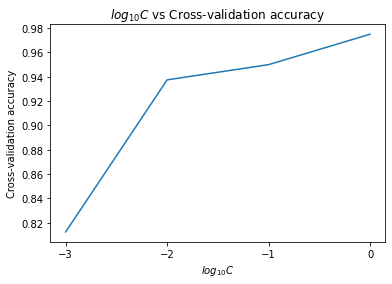

The best C is  1
The accuracy of Logistic Regression Classifier is  0.8333333333333334


In [344]:
# Hyperparameters that will be evaluated
C_sets = [0.001, 0.01, 0.1, 1]

# Logistic Regression (aka logit, MaxEnt) classifier
logistic = LogisticRegression(max_iter=1000)
# Determine training and test scores for varying parameter values
train_scores, test_scores = validation_curve(logistic, X_train, y_train, param_name='C', cv=10, n_jobs=-1,param_range=C_sets, scoring='accuracy')

# Show the plot
plt.title('$log_{10}C$ vs Cross-validation accuracy')
plt.xlabel('$log_{10}C$')
plt.ylabel('Cross-validation accuracy')
plt.xticks(np.log10(C_sets))
plt.plot(np.log10(C_sets), np.mean(test_scores, axis=1))
plt.show()

# Find the best value of hyperparameter C
best_C = C_sets[np.argmax(np.mean(test_scores, axis=1))]
print('The best C is ', best_C)

# Logistic Regression with best value of C
best_logistic = LogisticRegression(C=best_C)
# Fit the random classifier
best_logistic.fit(X_train, y_train)
# Perform classification on test vectors X_test
y_hat = best_logistic.predict(X_test)
# Accuracy classification score
acc = accuracy_score(y_test, y_hat)
# Print the accuracy of Logistic Regression Classifier
print('The accuracy of Logistic Regression Classifier is ', acc)


# **SVM** (RBF kernel)

reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC

The best C is  10000


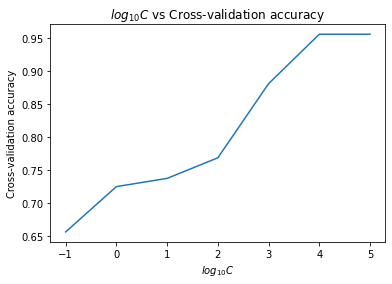

The accuracy of SVM Classifier(RBF kernel) is  0.8333333333333334


In [345]:
# Initializ
best_C = 0
max = 0

# Hyperparameters that will be evaluated
C_sets = [0.1, 1, 10, 100, 1000, 10000, 100000]
validation_acc = []

for i in C_sets:
    svm = SVC(C=i)
    c = np.mean(cross_val_score(svm, X_train, y_train, cv=10, scoring='accuracy'))
    validation_acc.append(c) 
    # Find the best value of hyperparameter C
    if c > max:
        max = c
        best_C = i
print('The best C is ', best_C)

# Show the plot
plt.title('$log_{10}C$ vs Cross-validation accuracy')
plt.xlabel('$log_{10}C$')
plt.ylabel('Cross-validation accuracy')
plt.xticks(np.log10(C_sets))
plt.plot(np.log10(C_sets), validation_acc)
plt.show()

# SVM with best value of C
best_svm = SVC(C=best_C)
# Fit the random classifier
best_svm.fit(X_train, y_train)
# Perform classification on test vectors X_test
y_hat = best_svm.predict(X_test)
# Accuracy classification score
acc = accuracy_score(y_test, y_hat)
print('The accuracy of SVM Classifier(RBF kernel) is ', acc)

# **SVM** (Linear kernel)

The best C is  10


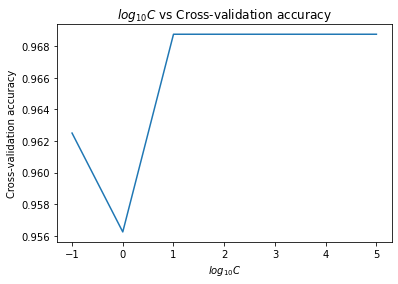

The accuracy of SVM Classifier(Linear kernel) is  0.8888888888888888


In [359]:
# Initializ
best_C = 0
max = 0

# Hyperparameters that will be evaluated
C_sets = [0.1, 1, 10, 100, 1000, 10000, 100000]
validation_acc = []

for i in C_sets:
    svm = SVC(kernel='linear', C=i)
    c = np.mean(cross_val_score(svm, X_train, y_train, cv=10, scoring='accuracy'))
    validation_acc.append(c) 
    # Find the best value of hyperparameter C
    if c > max:
        max = c
        best_C = i
print('The best C is ', best_C)

# Show the plot
plt.title('$log_{10}C$ vs Cross-validation accuracy')
plt.xlabel('$log_{10}C$')
plt.ylabel('Cross-validation accuracy')
plt.xticks(np.log10(C_sets))
plt.plot(np.log10(C_sets), validation_acc)
plt.show()

# SVM with best value of C
best_svm = SVC(kernel='linear', C=best_C)
# Fit the random classifier
best_svm.fit(X_train, y_train)
# Perform classification on test vectors X_test
y_hat = best_svm.predict(X_test)
# Accuracy classification score
acc = accuracy_score(y_test, y_hat)
print('The accuracy of SVM Classifier(Linear kernel) is ', acc)

# **MLP Classifier**

Multi-layer Perceptron classifier

reference: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier

The best alpha is  10


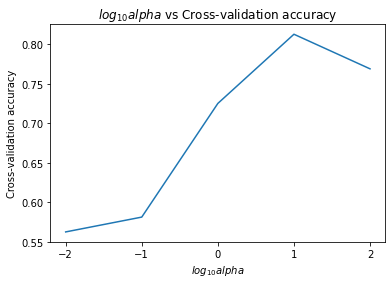

The accuracy of MLP Classifie is  0.7777777777777778


In [360]:
# Initializ
best_alpha = 0
max = 0

# Hyperparameters that will be evaluated
alpha_sets = [0.01, 0.1, 1, 10, 100]
validation_acc = []

for i in alpha_sets:
    mlp = MLPClassifier(alpha=i)
    a = np.mean(cross_val_score(mlp, X_train, y_train, cv=10, scoring='accuracy'))
    validation_acc.append(a) 
    # Find the best value of hyperparameter C
    if a > max:
        max = a
        best_alpha = i
print('The best alpha is ', best_alpha)

# Show the plot
plt.title('$log_{10}alpha$ vs Cross-validation accuracy')
plt.xlabel('$log_{10}alpha$')
plt.ylabel('Cross-validation accuracy')
plt.xticks(np.log10(alpha_sets))
plt.plot(np.log10(alpha_sets), validation_acc)
plt.show()

# SVM with best value of C
best_mlp = MLPClassifier(alpha=best_alpha)
# Fit the random classifier
best_mlp.fit(X_train, y_train)
# Perform classification on test vectors X_test
y_hat = best_mlp.predict(X_test)
# Accuracy classification score
acc = accuracy_score(y_test, y_hat)
print('The accuracy of MLP Classifie is ', acc)